In [32]:
def extract_non_comment_lines(filename):
    non_comment_lines = []
    with open(filename, 'r') as file:
        for line in file:
            if not line.strip().startswith('#') and line.strip():
                non_comment_lines.append(line.strip())
    return non_comment_lines

input_filename = 'hp7_custom_labels.iob2'
output_filename = 'hp7_custom_labels_no_hashtags.iob2'

non_comment_lines = extract_non_comment_lines(input_filename)

# Write the non-comment lines to the new file
with open(output_filename, 'w') as output_file:
    for line in non_comment_lines:
        output_file.write(line + '\n')

print(f"File '{output_filename}' created successfully!")


File 'hp7_custom_labels_no_hashtags.iob2' created successfully!


In [33]:
import pandas as pd

# Read the file into a list
filename = 'hp1_custom_labels_no_hashtags.iob2'
with open(filename, 'r') as file:
    lines = file.readlines()

# Initialize empty lists for each column
line_numbers = []
words = []
categories = []
extra1_values = []
extra2_values = []

# Process each line
for line in lines:
    parts = line.strip().split('\t')
    if len(parts) >= 4:  # Ensure we have at least 4 columns
        line_numbers.append(parts[0])
        words.append(parts[1])
        categories.append(parts[2])
        extra1_values.append(parts[3])
        extra2_values.append(parts[4] if len(parts) >= 5 else '')

# Create a DataFrame
df = pd.DataFrame({
    'Line Number': line_numbers,
    'Word': words,
    'Category': categories,
    'Extra1': extra1_values,
    'Extra2': extra2_values
})

# Display the first few rows
print(df.head())


  Line Number    Word Category Extra1 Extra2
0           1       I        O      O      O
1           2  should        O      O      O
2           3    have        O      O      O
3           4   known        O      O      O
4           5    that        O      O      O


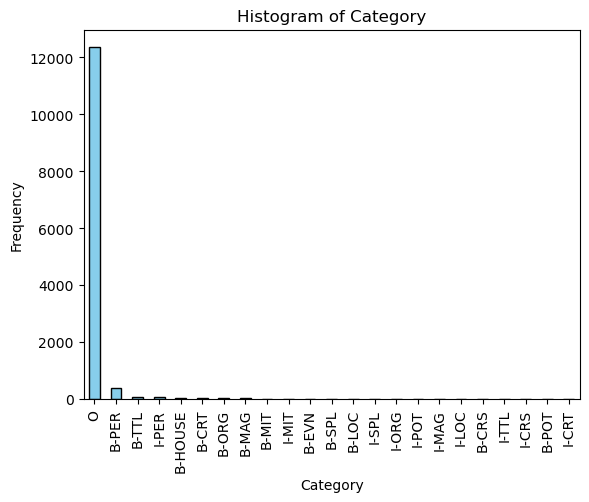

In [34]:
import matplotlib.pyplot as plt
# Compute the frequency of each category
category_counts = df['Category'].value_counts()

# Create a bar plot (histogram)
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of Category')
plt.show()

In [35]:
# Filter out rows where the category is not 'O'
filtered_df = df[df['Category'] != 'O']

# Display the filtered DataFrame
print(filtered_df)

      Line Number        Word Category Extra1 Extra2
10             11   Professor    B-TTL      O      O
11             12  McGonagall    B-PER      O      O
16              4   Professor    B-TTL      O      O
17              5  Dumbledore    B-PER      O      O
24             12       Albus    B-PER      O      O
...           ...         ...      ...    ...    ...
13085           3      Hagrid    B-PER      O      O
13100          14       Harry    B-PER      O      O
13111          25      Dudley    B-PER      O      O
13141           2      Hagrid    B-PER      O      O
13152          13    Hogwarts    B-ORG      O      O

[839 rows x 5 columns]


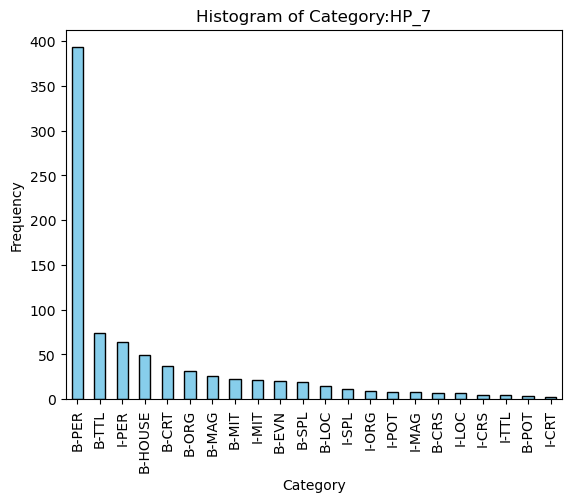

Image Saved


In [36]:
# Compute the frequency of each category
category_counts = filtered_df['Category'].value_counts()

# Create a bar plot (histogram)
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of Category:HP_7')
plt.savefig('hist_HP_7', dpi=300)  # High-resolution PNG

plt.show()

print("Image Saved")